In [12]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#reading the data
data=pd.read_csv('/content/drive/MyDrive/Machine Learning/Titanic/data_cleaned.csv')

In [15]:
#shape of the data
data.shape

(891, 25)

In [16]:
data['Age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [17]:
#first five rows of the data
data.head(5)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [18]:
#checking missing values in the data
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [19]:
# To build any Model using sklearn we have to specify Dependent and Independent Variables
#seperating independent and dependent variables
y = data['Survived']
X = data.drop(['Survived'], axis=1)

In [20]:
#importing train_test_split to create test set
from sklearn.model_selection import train_test_split

In [21]:
# creating the train and test set
# random_state = 101 is the random seed for reproducibility.
# This ensures that each time you run the code, you get the same observations in the train and testing set.
# stratify=y ensures that the splitting process preserves the proportion of classes in the target variable y
# test_size=0.20 Means 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.20)

In [52]:
X_train.columns

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [22]:
# distribution in training set
# Counts of the people who survived and those who died
y_train.value_counts()

Survived
0    439
1    273
Name: count, dtype: int64

In [23]:
# distribution in Test set
y_test.value_counts(normalize=True)

Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64

In [24]:
X_train['Fare'].describe()

count    712.000000
mean      32.633151
std       49.332935
min        0.000000
25%        7.917700
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [25]:
#shape of training set
X_train.shape, y_train.shape

((712, 24), (712,))

In [26]:
#shape of test set
X_test.shape, y_test.shape

((179, 24), (179,))

In [27]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
#creating the decision tree function
# random_state=10 Ensures evertime you run the model you get the same results
dt_model = DecisionTreeClassifier(random_state=10)

In [29]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [30]:
#checking the training score (Accuracy)
dt_model.score(X_train, y_train)

0.9859550561797753

In [31]:
#checking the test score (Accuracy)
dt_model.score(X_test, y_test)

0.7486033519553073

In [32]:
X_test.shape

(179, 24)

In [33]:
#predictions on test set
dt_model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1])

In [34]:
# The probability of surviving
dt_model.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

In [35]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [36]:
# Changing the threshold
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_new)

0.7486033519553073

## Changing the max_depth

In [39]:
# Increasing the Learning rate to increase accuracy and find the optimum value
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [40]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head(10)

,max_depth,train_acc,test_acc
0,1,0.797753,0.743017
1,2,0.801966,0.754190
2,3,0.834270,0.776536
3,4,0.851124,0.787709
4,5,0.852528,0.793296
5,6,0.872191,0.787709
6,7,0.891854,0.776536
7,8,0.910112,0.798883
8,9,0.925562,0.782123


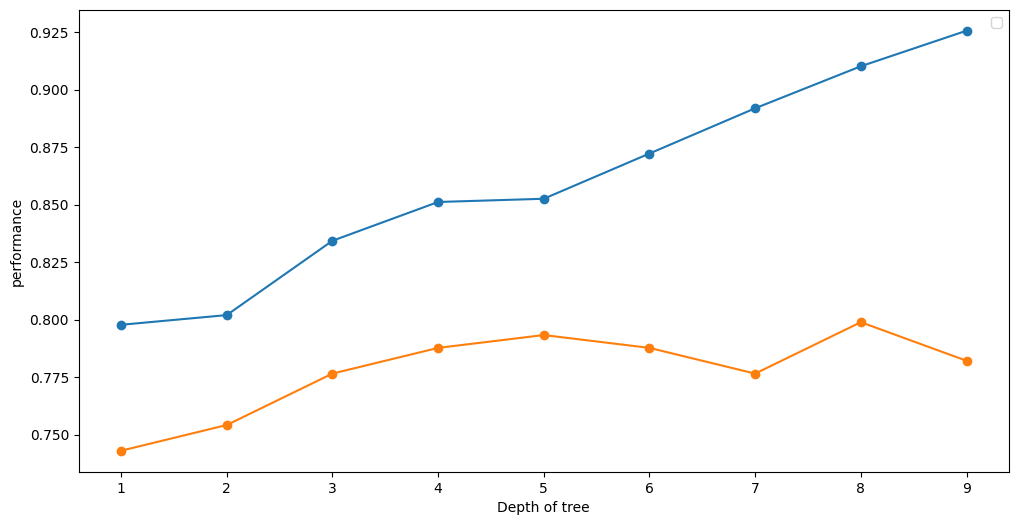

In [41]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

* max_leaf_nodes
* min_samples_split
* min_samples_leaf

In [42]:
# Training the Decision tree again
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [43]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [44]:
#Training score
dt_model.score(X_train, y_train)

0.8834269662921348

In [45]:
#Test score
dt_model.score(X_test, y_test)

0.8212290502793296

In [46]:
from sklearn import tree

In [47]:
!pip install graphviz

In [48]:
import graphviz

In [49]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=3,filled=True)

In [50]:
!dot -Tpng tree.dot -o tree.png

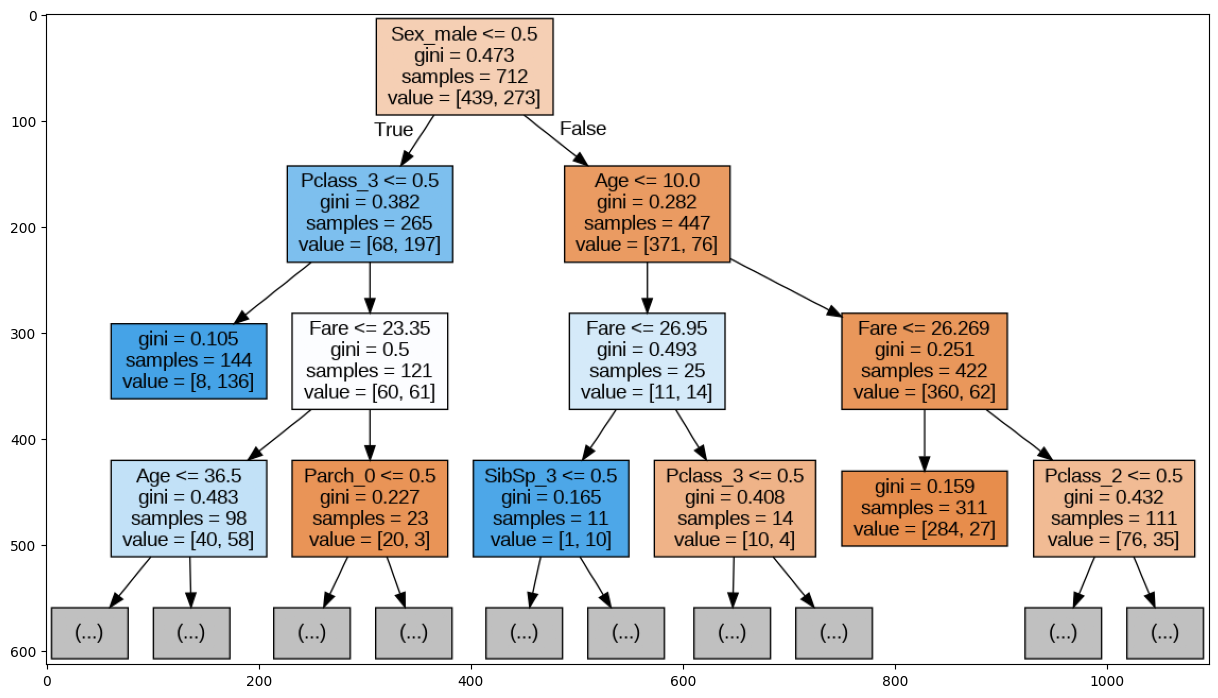

In [51]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)